# Линейная алгебра. Лабораторная работа 1, осень 2021


В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [ ]:
# Запустите этот код
from math import sqrt
import math
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных - это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [ ]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)` и `np.dot(A, B)`, `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` - это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` - это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` - это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)` 

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1.   В первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;
2.   Поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была -- как они справлялись;
3.   Попросите помощи у вашего учебного ассистента.

Важно искать помощь именно в таком порядке! Если ни один из шагов выше не помог или вы столкнулись с ситуацией, в которой вам заведомо не поможет ни один из пунктов выше (например, в задании вас просят доказать заведомо ложное утверждение), тогда можете написать сюда: st-fedotov@yandex-team.ru (Станислав Федотов, выступал перед выдачей лабораторной), или сюда: [@johanDDC](https://t.me/johanDDC) (Ваня Пешехонов, ассистент курса).



**И всё-таки задание**

**Задание 1.1 [0.2 за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [ ]:
# Your code here
A = np.zeros([3, 4])
print(A)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
A = np.diag([1, 2, 3, 4, 5])
print(A)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [ ]:
print(A.trace())

15


In [ ]:
print(sla.inv(A))

[[ 1.          0.         -0.          0.         -0.        ]
 [ 0.          0.5        -0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [ ]:
X = np.random.rand(4, 5)
print(X)

[[0.55822978 0.55077884 0.59733096 0.89711384 0.33337111]
 [0.59000343 0.78746573 0.03875378 0.20783652 0.0364574 ]
 [0.19079054 0.34932149 0.2648129  0.47523906 0.98902748]
 [0.81623065 0.07700056 0.35143984 0.26293175 0.99199189]]


In [ ]:
print(sla.det(X[np.ix_((1, 2), (0, 1))]))

0.055859868320709286


In [ ]:
print(X.T @ X)

[[1.36235804 0.90156609 0.69369256 0.92870399 1.20599894]
 [0.90156609 1.0514142  0.47908043 0.84403257 0.63419519]
 [0.69369256 0.47908043 0.55194197 0.76218245 0.81107845]
 [0.92870399 0.84403257 0.76218245 1.14299454 1.03749967]
 [1.20599894 0.63419519 0.81107845 1.03749967 2.07468869]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [0.75 баллов]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [ ]:
def my_det(X_):
    '''
    Parameters
    ----------
    X : array_like
    
    Returns
    -------
    det : float
        Determinant of `a`.
    '''
    X = X_
    # Your code here
    if not(len(X.shape) == 2 and X.shape[0] == X.shape[1]):
        raise ValueError
    n = len(X)
    det = 1.0
    for i in range(n):
        if X[i][i] == 0:
            for j in range(i, n):
                if X[j][i] != 0.0:
                    X[[i, j], :] = X[[j, i], :]
                    det *= -1.0
                    break
        if X[i][i] == 0:
			      return 0
        for j in range(i + 1, n):
            e = X[j][i]
            X[j,:] -= X[i,:] / X[i,i] * X[j,i]
        det *= X[i][i]
            
    return det

Простая проверка:

In [ ]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(np.linalg.det(X))

-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [ ]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8, 8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

The slowest run took 10.67 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 15.6 µs per loop
1000 loops, best of 5: 281 µs per loop
1000 loops, best of 5: 209 µs per loop
10 loops, best of 5: 30.1 ms per loop
10 loops, best of 5: 35.6 ms per loop


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in double_scalars


1 loop, best of 5: 4.05 s per loop


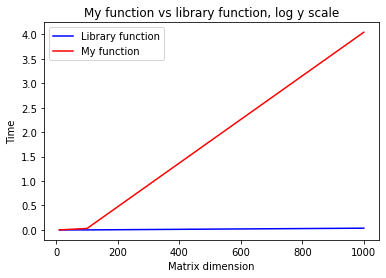

In [ ]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

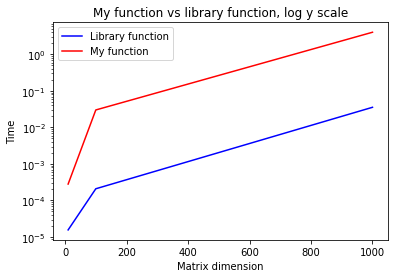

In [ ]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

**Задание 3.1 [0.5 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [ ]:
# Your code here
A1 = np.array([[1, 0], [10**(20), 1]])
B1 = np.array([[10**(-20), 1], [0, 1-10**(20)]])
A2 = np.array([[1., 0.], [10.**(20), 1.]])
B2 = np.array([[10.**(-20), 1.], [0., 1.-10.**(20)]])
print(A1 @ B1)
print(A2 @ B2)

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
Первое

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [ ]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim))
    for i in range(dim):
        P[0][i] = 1.
        P[i][0] = 1.
    for i in range(1, dim):
        for j in range(1, dim):
            P[i][j] = P[i-1][j] + P[i][j-1]
                    
    
    # Your code here
    
    return P

In [ ]:
print(my_pascal(7))

[[  1.   1.   1.   1.   1.   1.   1.]
 [  1.   2.   3.   4.   5.   6.   7.]
 [  1.   3.   6.  10.  15.  21.  28.]
 [  1.   4.  10.  20.  35.  56.  84.]
 [  1.   5.  15.  35.  70. 126. 210.]
 [  1.   6.  21.  56. 126. 252. 462.]
 [  1.   7.  28.  84. 210. 462. 924.]]


Чему равен её определитель? Строго поясните свой ответ.

----
Определитель = 1.

Будем использовать элементарные преобразования: вычтем из последней строки предпоследнюю, из предпоследнюю предпредпоследнюю и так далее. По свойствам треугольника Паскаля:    

-первый столбец будет состоять из одних 0 и единицы в первой строке

-треугольник Паскаля "сдвинулся" на одну клетку вправо. 

Теперь делаем тоже самое, но уже для нижней правой матрицы размера dim-1, и так далее
Тогда мы получим матрицу ступенчатого вида, на главной диагонали, к-ого одни единицы. Определитель такой матрицы = 1.

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [ ]:
# Your code here
A = sla.pascal(30)
print(sla.det(A))

4.6365440194083456e+47


Разница заметна невооружённым взглядом!

Как вы помните из лекций, квадратная матрица называется вырожденной, если её определитель равен нулю. На практике часто приходится иметь дело с матрицами, "близкими" к вырожденным. Вырожденные и близкие к вырожденным матрицы обладают мерзким свойством численной неустойчивости. Что такое численная неустойчивость? Скажем, пусть мы решаем систему $Ax = b$, и пусть $\dot x$ -- её частное решение. Теперь предположим, что правая часть системы немного испортилась (например, если правая часть -- это выход какого-то алгоритма, то тогда она может испортиться из-за неточных вычислений в этом алгоритме), и теперь мы решаем систему $Ax = b + \Delta b$. Если элементы вектора $\Delta b$ невелики по модулю, нам бы очень хотелось, чтобы и решение новой системы не сильно отличалось от решения исходной системы. Именно это мы и будем называть численной устойчивостью.

**Задание 3.3 [0.15 балла]** Дана система
$$
\begin{cases}
x_1 + 1000x_2 = 2004\\
100x_1 + 100001x_2 = 200402
\end{cases}
$$
Найдите решение этой системы (можно устно). Найдите определитель её матрицы коэффициентов.

In [ ]:
# Your code here
'''
x1 = 4
x2 = 2
'''
A = np.array([[1., 1000.], [100., 100001.]])
print(sla.det(A))

1.0000000000047748


Теперь немного испортим правую часть этой системы, пусть теперь она имеет вид
$$
\begin{cases}
x_1 + 1000x_2 = 2004.01\\
100x_1 + 100001x_2 = 200402
\end{cases}
$$

Найдите решение системы с испорченной правой частью. Сравните решения исходной и новой систем. Что вы можете сказать?

In [ ]:
# Your code here
'''
x1 = 1004.01
x2 = 1
'''

'\nx1 = 1004.01\nx2 = 1\n'

Оказывается, что значение определителя довольно плохо измеряет степень отклонения данной матрицы от вырожденной. Хорошей метрикой в этом плане является число обусловленности матрицы.

**Определение**. Пусть $A$ -- квадратная матрица порядка $n$. Числом обусловленности матрицы $A$ назовём число $\mathrm{cond}(A)$, определяемое по формуле
$$
\mathrm{cond}(A) = \sqrt{\mathrm{tr}(A^TA)\mathrm{tr}((A^{-1})^TA^{-1})}
$$
Если матрица вырожденна, то $\mathrm{cond}(A)$ положим равным бесконечности.

Как можно догадаться из определения, матрица тем ближе к вырожденной, чем больше её число обусловленности, ведь у вырожденной матрицы это число равно бесконечности!

**Задание 3.4 [0.2 баллов]** Напишите функцию, которая для заданной матрицы $A$ возвращает её число обусловленности. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [ ]:
def my_cond(A):
    '''
    Parameters
    ----------
    A : array_like
    
    Returns
    -------
    cond : float
          Condition number of A.
    '''
    
    # Your code here
    cond = (np.trace(A.T @ A) * np.trace(sla.inv(A).T @ sla.inv(A))) ** (0.5)
    
    return cond

Посчитайте число обусловленности матрицы из задания 3.3.

In [ ]:
# Your code here
print(my_cond(A))

10001210002.009096


Постройте график зависимости числа обусловленности матрицы Паскаля от размера $n \in [5, 30]$.

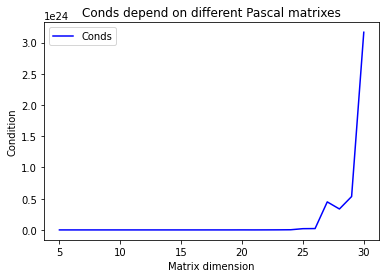

In [ ]:
# Your code here

dimensions = []
conds = []

for i in range (5, 31):
    dimensions.append(i)
    conds.append(my_cond(my_pascal(i)))    

plt.plot(dimensions, conds, color='blue', label='Conds')
plt.title('Conds depend on different Pascal matrixes')
plt.ylabel('Condition')
plt.xlabel('Matrix dimension')
plt.legend()


Как видите, посчитанные выше числа обусловленности весьма велики, что вполне согласуется с численными эффектами, которые вы наблюдали ранее при работе с соответствующими матрицами.

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [ ]:
# Your code here
def prod_and_sq_sum(A)
    return np.prod(np.diagonal(A)), (np.diagonal(A) * np.diagonal(A)).sum()

**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы, $\lambda_1, \ldots, \lambda_n$ --- некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [ ]:
# Your code here
def f(A, B, lmbd, k):
    m = A.shape[0] 
    n = A.shape[1]
    A *= lmbd.reshape(1, n)
    A1 = A[np.ix_([0, m-1],[0, min(n-1, k-1)])]
    B = B.T
    B1 = B[np.ix_([0, min(n-1, k-1)],[0, m-1])]
    return A1 @ B1

[[10 28]
 [28 82]]


**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [ ]:
# Your code here
def get_diag(A, B):
    A *= B.T
    return A.sum(axis=1)

[[25 14]
 [ 3 42]]
[ 553 1194]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.75 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.75 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.75 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [ ]:
def shrink_rotate(x, a, coef=1., angle=0.):
    # Your code here
    len = sqrt((x.real-a.real)**(2) + (x.imag-a.imag)**(2))
    xangle = math.acos((x.real-a.real)/len)
    xangle2 = math.asin((x.imag-a.imag)/len)
    if (xangle2 < 0):
        xangle = 2 * math.pi - xangle

    angle += xangle
    
    len *= coef

    real_p = math.cos(angle) * len
    imag_p = math.sin(angle) * len
    return a.real+real_p + (a.imag+imag_p) * 1j
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    # Your code here
    g = shrink_rotate(x, a, coef, angle)
    return g.real+(2*a.imag-g.imag) * 1j
    
def geometric_inverse(x, a, r):
    # Your code here
    len = sqrt((x.real-a.real)**(2) + (x.imag-a.imag)**(2))
    return (shrink_rotate(x, a, (r**(2))/(len**(2)), 0))
print(geometric_inverse(2 + 2 * 1j, 0 + 0 * 1j, 1))

(0.24999999999999994+0.25j)


**Задание 5.4 [0.5 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

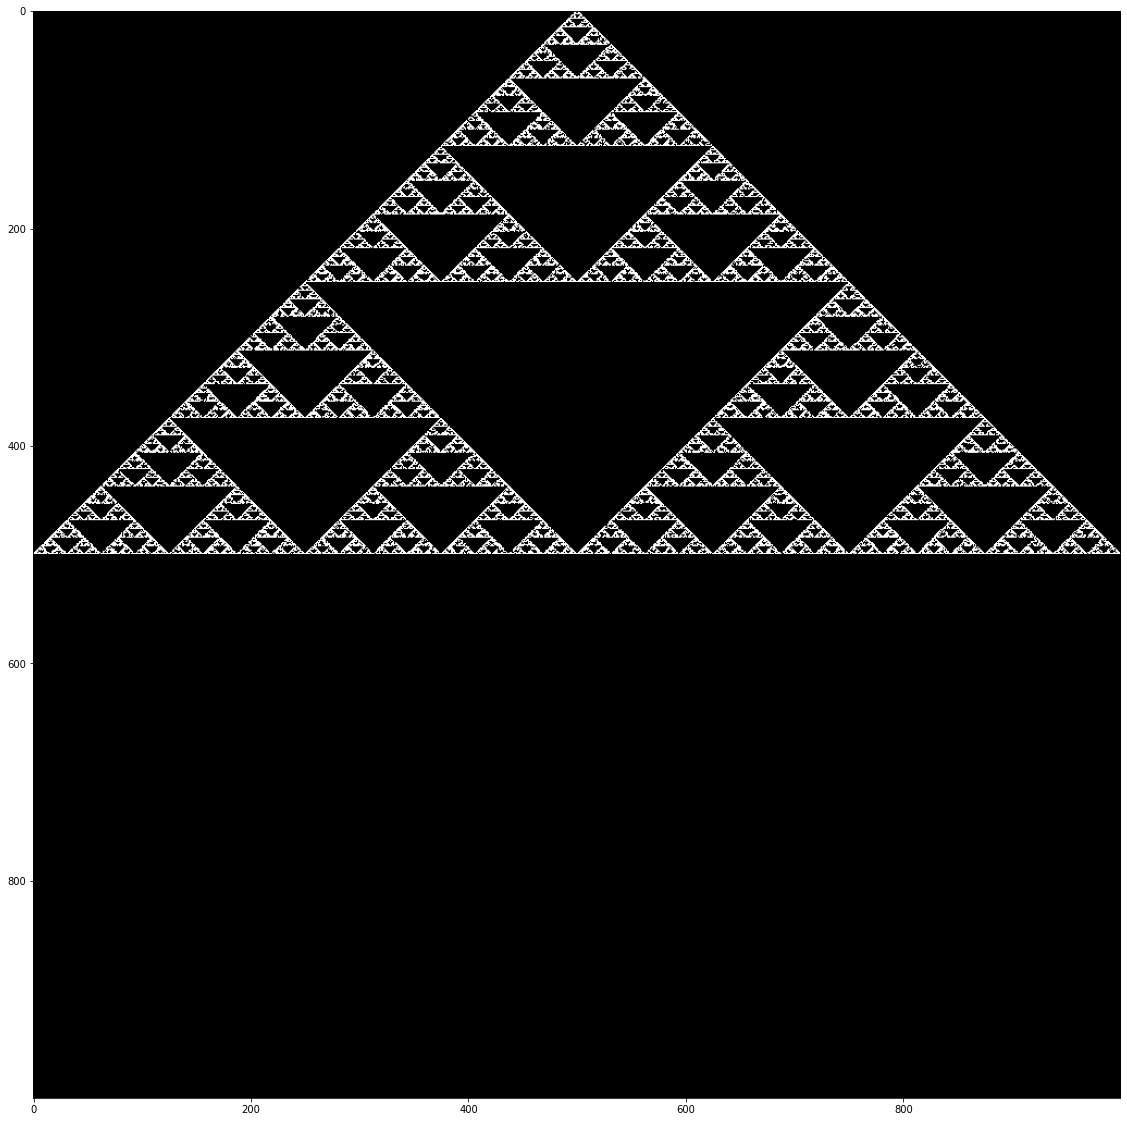

In [ ]:
# Your code here
z = 0.5 + 0.*1j
max_iter = 100000
pixels = np.zeros([1000, 1000])
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    if n_iter >= 10:
        x = int(500 * (z.real + 1))
        y = int(500 * (z.imag + 1))
        pixels[999-y, x] = 1
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
plt.figure(figsize=(20, 20))
plt.imshow(pixels, cmap='gray')

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

---
Начальная точка находится на фрактале. Также, три точки - три крайние точки фрактала. Заметим, что мы выбираем всегда точки, находящиеся на середине между нашей точкой и концом фрактала, а эти точки также лежат на средней линии или основании какого-то треугольника фрактала.

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

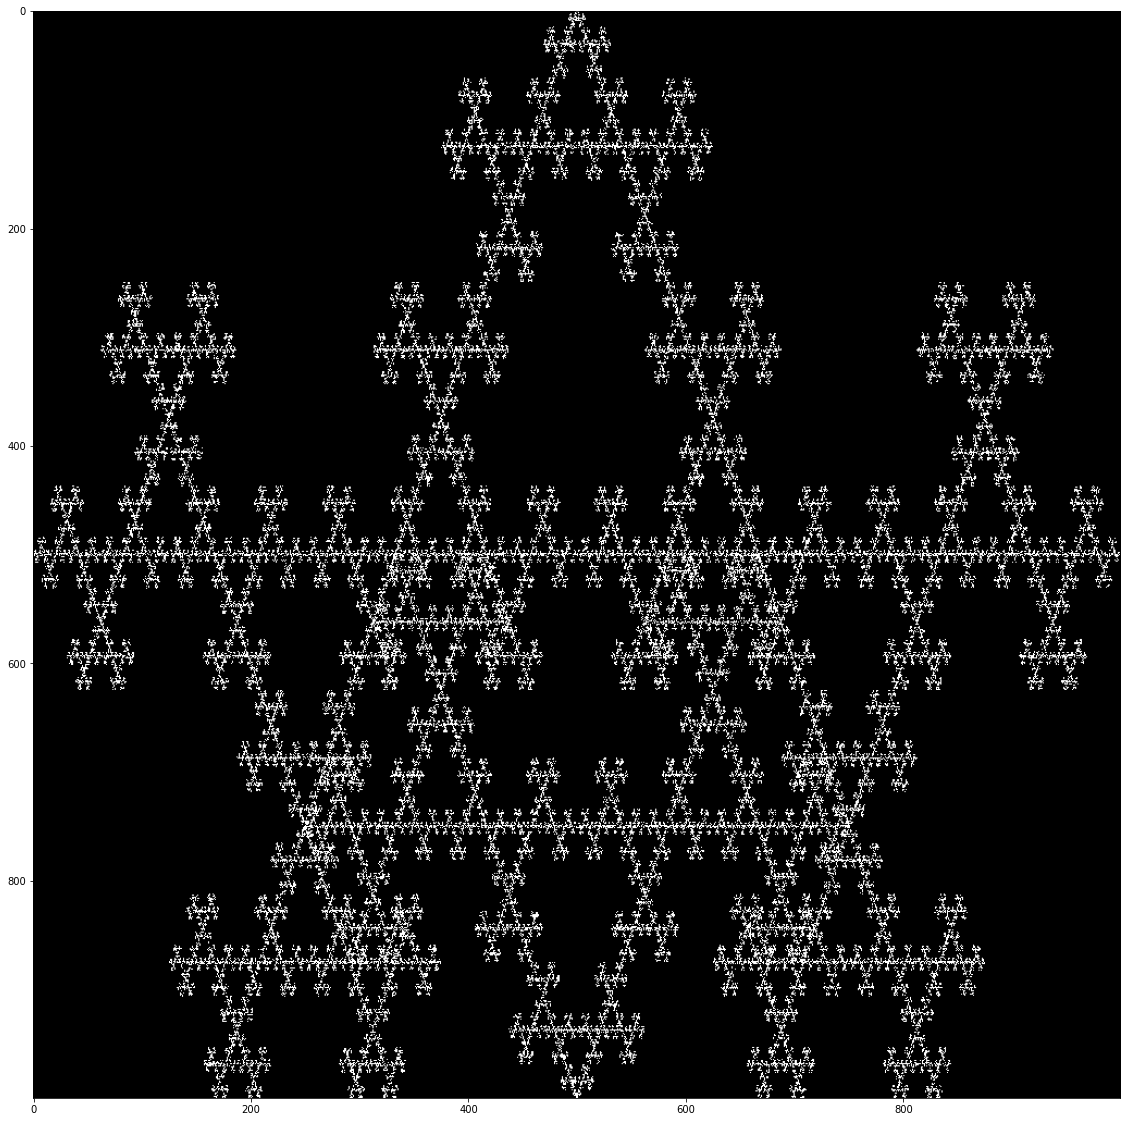

In [ ]:
# Your code here
z = 1/2 + 0.*1j
max_iter = 100000
pixels = np.zeros([1000, 1000])
funcs = [
    (lambda t: shrink_rotate_conj(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    if n_iter >= 10:
        x = int(500 * (z.real + 1))
        y = int(500 * (z.imag + 1))
        pixels[999-y, x] = 1
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
plt.figure(figsize=(20, 20))
plt.imshow(pixels, cmap='gray')

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ --- матрица размера $n\times n$, а $B$ --- матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

The slowest run took 68.86 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 68.5 µs per loop
The slowest run took 60.83 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 24.7 µs per loop
1000 loops, best of 5: 172 µs per loop
10000 loops, best of 5: 167 µs per loop
1000 loops, best of 5: 427 µs per loop
1000 loops, best of 5: 543 µs per loop
1000 loops, best of 5: 1.53 ms per loop
100 loops, best of 5: 3.38 ms per loop
100 loops, best of 5: 12.3 ms per loop
10 loops, best of 5: 27.9 ms per loop
10 loops, best of 5: 56.3 ms per loop
10 loops, best of 5: 166 ms per loop


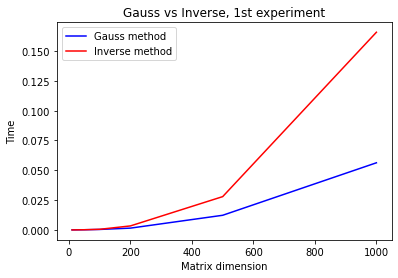

In [ ]:
# Your code here
dimensions = [10, 50, 100, 200, 500, 1000]
gauss_times = []
inverse_times = []

for dim in dimensions:
    A = np.random.rand(dim, dim)
    B = np.random.rand(dim, 10)
    res_gauss = %timeit -o sla.solve(A, B)
    gauss_times.append(res_gauss.best)
    res_inv = %timeit -o sla.inv(A) @ B
    inverse_times.append(res_inv.best)    
plt.plot(dimensions, gauss_times, color='blue', label='Gauss method')
plt.plot(dimensions, inverse_times, color='red', label='Inverse method')
plt.title('Gauss vs Inverse, 1st experiment')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

1000 loops, best of 5: 612 µs per loop
1000 loops, best of 5: 861 µs per loop
1000 loops, best of 5: 1.41 ms per loop
The slowest run took 4.03 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 1.63 ms per loop
100 loops, best of 5: 2.37 ms per loop
100 loops, best of 5: 2.24 ms per loop
100 loops, best of 5: 4.32 ms per loop
100 loops, best of 5: 3.42 ms per loop
100 loops, best of 5: 11.2 ms per loop
100 loops, best of 5: 8.87 ms per loop
10 loops, best of 5: 21.1 ms per loop
100 loops, best of 5: 15.6 ms per loop


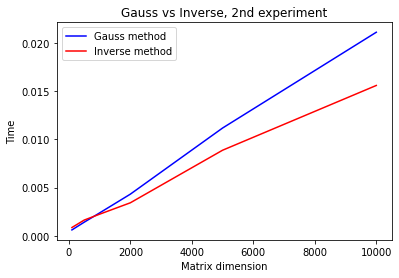

In [ ]:
dimensions = [100, 500, 1000, 2000, 5000, 10000]
gauss_times = []
inverse_times = []

for dim in dimensions:
    A = np.random.rand(100, 100)
    B = np.random.rand(100, dim)
    res_gauss = %timeit -o sla.solve(A, B)
    gauss_times.append(res_gauss.best)
    res_inv = %timeit -o sla.inv(A) @ B
    inverse_times.append(res_inv.best)    

plt.plot(dimensions, gauss_times, color='blue', label='Gauss method')
plt.plot(dimensions, inverse_times, color='red', label='Inverse method')
plt.title('Gauss vs Inverse, 2nd experiment')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()